C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Classification Report:
                     precision    recall  f1-score   support

      NetworkIssue       1.00      1.00      1.00       565
         NoFailure       0.95      1.00      0.98      2141
ResourceExhaustion       1.00      0.99      1.00       190
 ServiceDisruption       0.00      0.00      0.00       104

          accuracy                           0.96      3000
         macro avg       0.74      0.75      0.74      3000
      weighted avg       0.93      0.96      0.95      3000



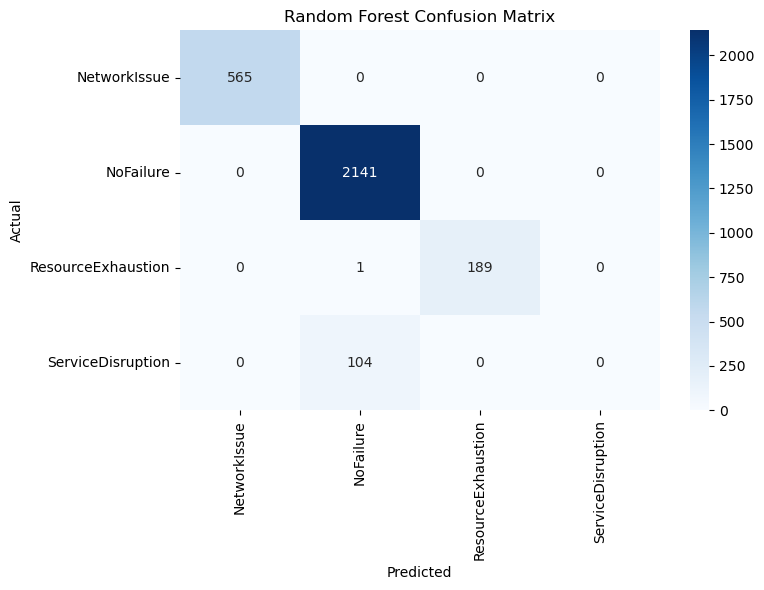

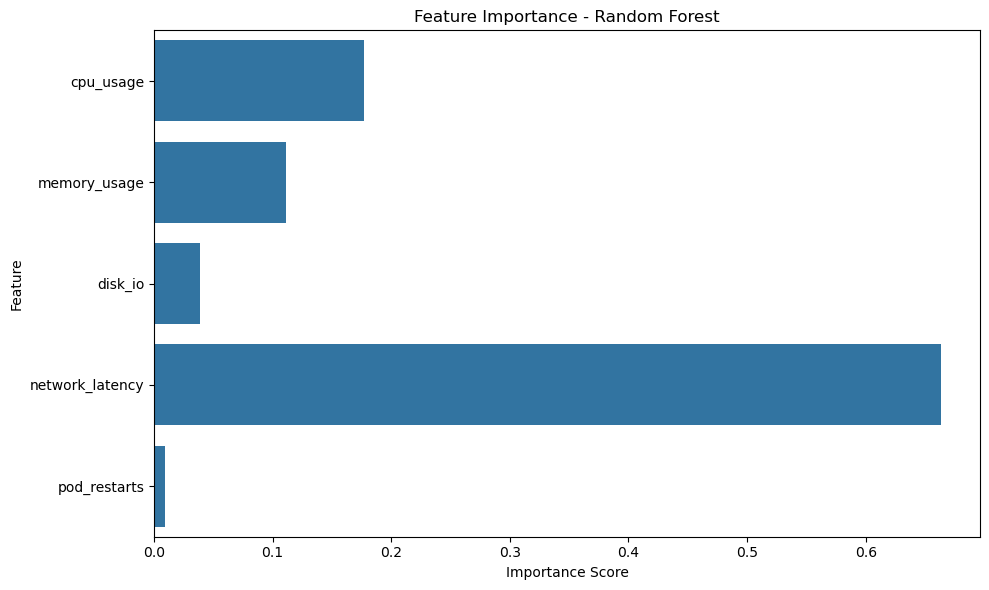

Model Accuracy (70/30 split): 0.9650


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/NEHAA.V/Desktop/k8s_failures_updated.csv'
df = pd.read_csv(file_path)

# Drop non-numeric or unused columns
df.drop(columns=['Timestamp'], inplace=True)

# Separate features and target
X = df.drop(columns=['failure_type'])
y = df['failure_type']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Classification Report
present_labels = np.unique(y_test)
present_class_names = le.inverse_transform(present_labels)

rf_report = classification_report(y_test, rf_preds, labels=present_labels, target_names=present_class_names)
print("Random Forest Classification Report:\n", rf_report)

# Confusion Matrix - Random Forest
rf_cm = confusion_matrix(y_test, rf_preds, labels=present_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', xticklabels=present_class_names, yticklabels=present_class_names, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Feature Importance - Random Forest
feature_importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Final Accuracy
accuracy = accuracy_score(y_test, rf_preds)
print(f"Model Accuracy (70/30 split): {accuracy:.4f}")

In [8]:
import subprocess

def remediate_action(failure_type, metadata=None):
    if failure_type == "resource_exhaustion":
        print("[ACTION] Scaling up the deployment...")
        # subprocess.run(["kubectl", "scale", "deployment", "my-deployment", "--replicas=5"])
        
    elif failure_type == "pod_failure":
        print("[ACTION] Restarting the failed pod...")
        # subprocess.run(["kubectl", "delete", "pod", "pod-name", "--grace-period=0", "--force"])
        
    elif failure_type == "node_failure":
        print("[ACTION] Draining the faulty node...")
        # subprocess.run(["kubectl", "drain", "node-name", "--ignore-daemonsets", "--delete-emptydir-data"])
        
    elif failure_type == "network_issue":
        print("[ACTION] Restarting network for affected pod or node...")
        # Simulated action
        
    elif failure_type == "service_disruption":
        print("[ACTION] Restarting the service...")
        # subprocess.run(["kubectl", "rollout", "restart", "deployment/my-service"])

    else:
        print("[ACTION] Unknown failure type. No remediation executed.")


In [10]:
# Decode the predicted and actual labels
y_test_labels = le.inverse_transform(y_test)
rf_preds_labels = le.inverse_transform(rf_preds)

# Loop through predictions and apply remediation
for i in range(len(rf_preds_labels)):
    actual = y_test_labels[i]
    predicted = rf_preds_labels[i]
    print(f"\n[Instance {i+1}]")
    print(f"Actual Failure: {actual}")
    print(f"Predicted Failure: {predicted}")
    
    if actual == predicted:
        print("[INFO] Prediction correct. Initiating remediation.")
        remediate_action(predicted)
    else:
        print("[WARNING] Prediction mismatch. Skipping remediation.")



[Instance 1]
Actual Failure: ResourceExhaustion
Predicted Failure: ResourceExhaustion
[INFO] Prediction correct. Initiating remediation.
[ACTION] Unknown failure type. No remediation executed.

[Instance 2]
Actual Failure: NetworkIssue
Predicted Failure: NetworkIssue
[INFO] Prediction correct. Initiating remediation.
[ACTION] Unknown failure type. No remediation executed.

[Instance 3]
Actual Failure: ResourceExhaustion
Predicted Failure: ResourceExhaustion
[INFO] Prediction correct. Initiating remediation.
[ACTION] Unknown failure type. No remediation executed.

[Instance 4]
Actual Failure: NoFailure
Predicted Failure: NoFailure
[INFO] Prediction correct. Initiating remediation.
[ACTION] Unknown failure type. No remediation executed.

[Instance 5]
Actual Failure: NoFailure
Predicted Failure: NoFailure
[INFO] Prediction correct. Initiating remediation.
[ACTION] Unknown failure type. No remediation executed.

[Instance 6]
Actual Failure: NoFailure
Predicted Failure: NoFailure
[INFO] Pr

In [12]:
remediation_log = []

for i in range(len(rf_preds_labels)):
    actual = y_test_labels[i]
    predicted = rf_preds_labels[i]
    
    if actual == predicted:
        action = f"Remediation for {predicted}"
        remediation_log.append((i, predicted, action))
    else:
        remediation_log.append((i, predicted, "Skipped due to mismatch"))

# Display the remediation log
import pandas as pd
log_df = pd.DataFrame(remediation_log, columns=["Index", "Predicted Issue", "Action Taken"])
log_df.head()


,Index,Predicted Issue,Action Taken
0,0,ResourceExhaustion,Remediation for ResourceExhaustion
1,1,NetworkIssue,Remediation for NetworkIssue
2,2,ResourceExhaustion,Remediation for ResourceExhaustion
3,3,NoFailure,Remediation for NoFailure
4,4,NoFailure,Remediation for NoFailure


In [14]:
success_count = sum(1 for i in range(len(y_test)) if rf_preds[i] == y_test[i])
total = len(y_test)
print(f"Remediation Success Rate: {success_count}/{total} = {success_count/total:.2%}")

Remediation Success Rate: 2895/3000 = 96.50%


In [22]:
import requests

response = requests.post("http://127.0.0.1:5000/remediate", json={
    "failure_type": "Resource Exhaustion",
    "deployment": "my-deployment"
})

print(response.text)

error: no objects passed to scale

